<a href="https://colab.research.google.com/github/Deepika1454/Audio-Classification-with-Pre-trained-Model/blob/main/Landmark_Guided_Human_Face_Segmentation_Using_Mediapipe_for_Accurate_Region_Based_Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

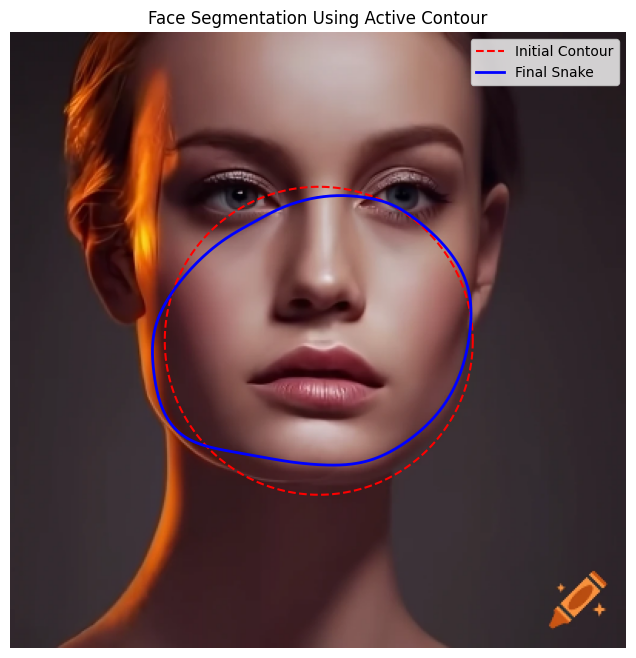

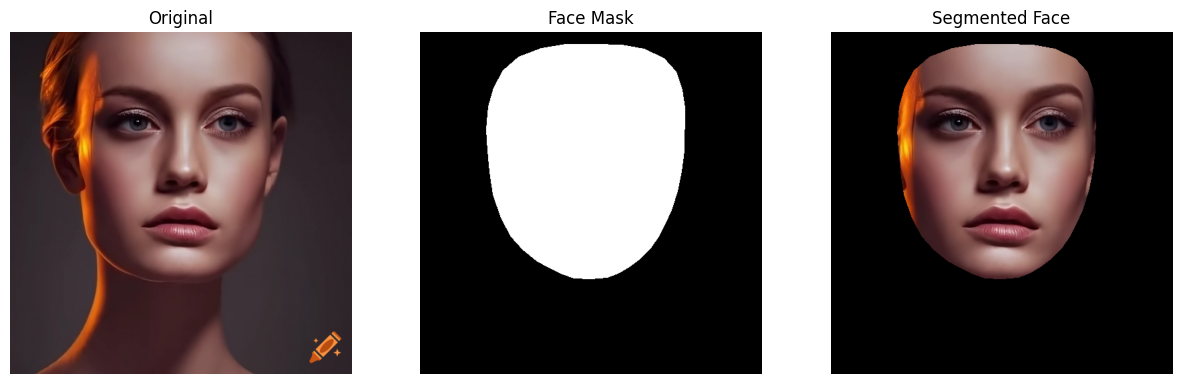

In [1]:

!pip install scikit-image matplotlib

!pip install mediapipe opencv-python matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2
import mediapipe as mp



image = io.imread('/content/contour.webp')  # Your image path

image = cv2.resize(image, (400, 400))
gray = color.rgb2gray(image)
gray_blur = gaussian(gray, sigma=3)

rows, cols = gray.shape
s = np.linspace(0, 2 * np.pi, 400)
r = rows // 2 + 100 * np.sin(s)
c = cols // 2 + 100 * np.cos(s)
init = np.array([r, c]).T

snake = active_contour(
    gray_blur,
    init,
    alpha=0.01,
    beta=10,
    gamma=0.001,
    convergence=0.1
)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.plot(init[:, 1], init[:, 0], '--r', label='Initial Contour')
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2, label='Final Snake')
ax.set_title("Face Segmentation Using Active Contour")
ax.legend()
ax.axis('off')
plt.show()

img = cv2.imread('/content/contour.webp')
img = cv2.resize(img, (512, 512))
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    annotated = rgb.copy()
    h, w, _ = rgb.shape
    face_landmarks = results.multi_face_landmarks[0]

    mask = np.zeros((h, w), dtype=np.uint8)

    face_outline_indices = list(range(0, 468))

    points = []
    for idx in face_outline_indices:
        pt = face_landmarks.landmark[idx]
        x, y = int(pt.x * w), int(pt.y * h)
        points.append((x, y))

    hull = cv2.convexHull(np.array(points))
    cv2.fillConvexPoly(mask, hull, 255)

    segmented = cv2.bitwise_and(rgb, rgb, mask=mask)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(rgb)
    axs[0].set_title('Original')
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Face Mask')
    axs[2].imshow(segmented)
    axs[2].set_title('Segmented Face')
    for ax in axs:
        ax.axis('off')
    plt.show()

else:
    print("No face detected.")

